# Estatísticas de domínios comuns no censo de Diários Oficiais

Agora temos uma funcionalidade no site do [Censo](https://censo.ok.org.br/) que permite baixar os dados do mapeamento.
A partir desses dados, podemos encontrar o domínio base dos diários oficiais e identificar
potenciais fontes para os _spiders_ do Querido Diário.

Para reproduzir esse notebook:
1. Acesse a página do [andamento do censo](https://censo.ok.org.br/andamento/#view) e faça o download dos dados
2. Coloque o arquivo na pasta `notebooks/`

In [344]:
# importa bibliotecas
from urllib.parse import urlparse
from functools import reduce
import pandas as pd

In [345]:
# carrega arquivo
df = pd.read_csv('base_mapeamento.csv', sep=',')

# pré-processamento dos dados: cria novo data frame acrescentando coluna "dominio_base",
# contendo todos os domínios disponíveis nas colunas fonte_1 a fonte_4
df_1 = df[df['fonte_1'] != 'None']
df_1.loc[:,'dominio_base'] = df_1['fonte_1'].apply(lambda url: urlparse(url).netloc)
df_2 = df[df['fonte_2'] != 'None']
df_2.loc[:,'dominio_base'] = df_2['fonte_2'].apply(lambda url: urlparse(url).netloc)
df_3 = df[df['fonte_3'] != 'None']
df_3.loc[:,'dominio_base'] = df_3['fonte_3'].apply(lambda url: urlparse(url).netloc)
df_4 = df[df['fonte_4'] != 'None']
df_4.loc[:,'dominio_base'] = df_4['fonte_4'].apply(lambda url: urlparse(url).netloc)
df = pd.concat([df_1, df_2, df_3, df_4])

# exclui colunas que não são de interesse para a análise e ordena data frame por município
df = df[['municipio','UF','regiao','populacao_2020','dominio_base']]
df.sort_values(by='municipio', inplace=True)

# exclui linhas duplicadas
df.drop_duplicates(inplace=True)

In [346]:
df.shape

(359, 5)

In [347]:
df["dominio_base"].describe()

count                            359
unique                           262
top       www.diariomunicipal.com.br
freq                              42
Name: dominio_base, dtype: object

In [348]:
df.head(30)

,municipio,UF,regiao,populacao_2020,dominio_base
0,Abaetetuba (PA),PA,Região Norte,159080,www.diariomunicipal.com.br
1,Abreu e Lima (PE),PE,Região Nordeste,100346,www.diariomunicipal.com.br
2,Alagoinhas (BA),BA,Região Nordeste,152327,doem.org.br
3,Almirante Tamandaré (PR),PR,Região Sul,120041,www.diariomunicipal.com.br
4,Altamira (PA),PA,Região Norte,115969,altamira.pa.gov.br
5,Alvorada (RS),RS,Região Sul,211352,www.diariomunicipal.com.br
6,Americana (SP),SP,Região Sudeste,242018,diariooficial.americana.sp.gov.br
7,Ananindeua (PA),PA,Região Norte,535547,www.ananindeua.pa.gov.br
8,Angra Dos Reis (RJ),RJ,Região Sudeste,207044,angra.rj.gov.br
9,Anápolis (GO),GO,Região Centro-Oeste,391772,www.diario.anapolis.go.gov.br:8124


## Análise por população: quais domínios atendem a um maior número de pessoas?

In [349]:
s1 = df.groupby(["dominio_base"])['populacao_2020'].sum() # população total atendida pelo domínio
s2 = df.groupby(["dominio_base"])['municipio'].nunique() # total de municípios atendidos pelo domínio
s3 = df.groupby(["dominio_base"])['UF'].nunique() # total de estados atendidos pelo domínio

# cria dataframe com base nas três séries acima, renomeia colunas e ordena por número de municípios atendidos pelo domínio
ss = [df1, df2, df3]
df_merged = pd.concat(ss, axis=1)
df_merged.columns = ['População', 'Municípios', 'UFs']
df_merged.sort_values(['População'], ascending=False)[:20]

,População,Municípios,UFs
dominio_base,,,
www.docidadesp.imprensaoficial.com.br,12325232,1,1
www.diariomunicipal.com.br,7844747,42,12
doweb.rio.rj.gov.br,6747815,1,1
www.dodf.df.gov.br,3055149,1,1
www.buriti.df.gov.br,3055149,1,1
www.dom.salvador.ba.gov.br,2886698,1,1
diariooficial.fortaleza.ce.gov.br,2686612,1,1
portal6.pbh.gov.br,2521564,1,1
diario.imprensaoficial.am.gov.br,2219580,1,1


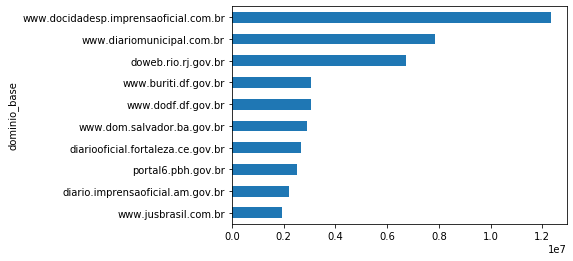

In [350]:
# Visualização dos 10 domínios que atendem às maiores populações
df_viz = df_merged['População'].sort_values(ascending=False)[:10]
ax = df_viz.plot.barh()
ax.invert_yaxis()

### Análise por população: resultados
1. A análise mostra que o domínio que atende à maior população é o domínio da cidade de São Paulo.
2. Em 2° lugar está o domínio www.diariomunicipal.com.br, que atende a uma população maior que a da cidade do Rio de Janeiro, mas espalhada em 42 municípios pertencentes a 12 estados brasileiros.
3. Em 3° lugar, aparece o domínio da cidade do Rio de Janeiro.

## Análise por município: quais domínios atendem a um maior número de municípios?

In [351]:
s1 = df.groupby(["dominio_base"])["municipio"].nunique() # total de municípios atendidos pelo domínio
s2 = df.groupby(["dominio_base"])["UF"].nunique() # total de estados atendidos pelo domínio
s3 = df.groupby(["dominio_base"])["regiao"].nunique() # total de regiões atendidas pelo domínio

# cria dataframe com base nas três séries acima, renomeia colunas e ordena por número de municípios atendidos pelo domínio
ss = [s1, s2, s3]
df_merged = pd.concat(ss, axis=1)
df_merged.columns = ['Municípios', 'UFs', 'Regiões']
df_merged.sort_values(by=["Municípios"], ascending=False)[:10]

,Municípios,UFs,Regiões
dominio_base,,,
www.diariomunicipal.com.br,42,12,5
diariomunicipal.sc.gov.br,7,1,1
www.diariooficial.rs.gov.br,7,1,1
diariooficial.abc.go.gov.br,6,1,1
imprensaoficialmunicipal.com.br,6,1,1
www.jornalminasgerais.mg.gov.br,5,1,1
www.ioepa.com.br,5,1,1
www.imprensaoficial.com.br,5,1,1
diariomunicipal.es.gov.br,4,1,1


### Análise por município: resultados
1. Como mencionado, o domínio www.diariomunicipal.com.br atende a 42 municípios, espalhados por 12 estados e nas 5 regiões do Brasil.
2. Empatados em 2° lugar, os domínios diariomunicipal.sc.gov.br e www.diariooficial.rs.gov.br	atendem a 7 municípios cada, nos estados do Santa Catarina e Rio Grande do Sul, respectivamente.

## Análise por UF: quais unidades federativas tem mais municípios sem domínio exclusivo para seus D.O.?

In [352]:
s1 = df.groupby(["UF"])['municipio'].nunique() # número de municípios na UF
s2 = df.groupby(["UF"])['dominio_base'].nunique() # número de domínios na UF

ss = [s1, s2, s1 - s2, (s1 - s2)/s1] # diferença entre os números de municípios e de domínios, e % de domínios compartilhados

# cria dataframe com base nas três séries acima, renomeia colunas, e ordena pelo percentual de domínios compartilhados na UF
df_merged = pd.concat(ss, axis=1)
df_merged.columns = ['Municípios', 'Domínios', 'Diferença', '% de iguais']
df_merged = df_merged.sort_values(by=["% de iguais"], ascending=False)

# formata última coluna em %
df_merged.style.format({
    '% de iguais': '{:.2%}'.format,
})

,Municípios,Domínios,Diferença,% de iguais
UF,,,,
PA,18,8,10,55.56%
SC,13,6,7,53.85%
RS,19,10,9,47.37%
GO,14,9,5,35.71%
AM,3,2,1,33.33%
ES,10,7,3,30.00%
PE,14,10,4,28.57%
MG,33,25,8,24.24%
CE,9,7,2,22.22%


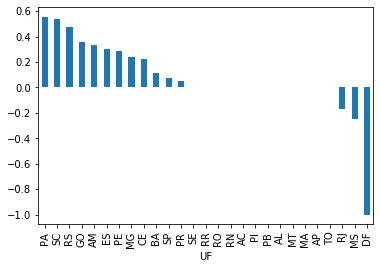

In [353]:
# Visualização da parcela de município que utilizam o mesmo domínio, por UF
df_merged['% de iguais'].plot.bar()

### Análise por UF: resultados
1. Neste item, o destaque negativo vai para o estado do Pará, onde 18 municípios compartilham apenas 8 domínios. Assim, cerca de 55% dos municípios desse estado não são atendidos por domínios exclusivos. O estado de Santa Catarina aparece quase na mesma situação, também com mais de 50% dos seus municípios utilizando domínios compartilhados.
2. Em 12 estados, o número de municípios é igual ao número de domínios utilizados para publicação dos diários oficiais (região central do gráfico de barras acima).
3. No Rio de Janeiro, Mato Grosso do Sul e Distrito Federal, há mais domínios que municípios (região à direita do gráfico de barras acima).

## Análise regional: quais regiões tem mais municípios sem domínio exclusivo para seus D.O.?

In [354]:
s1 = df.groupby(['regiao'])['municipio'].nunique()  # número de municípios na região
s2 = df.groupby(['regiao'])['dominio_base'].nunique() # número de domínios na região

# diferença entre os números de municípios e de domínios, e % de domínios compartilhados
ss = [s1, s2, s1 - s2, (s1 - s2)/s1]

# cria dataframe com base nas três séries acima, renomeia colunas, e ordena pelo percentual de domínios compartilhados na região
df_merged = pd.concat(ss, axis=1)
df_merged.columns = ['Municípios', 'Domínios', 'Diferença', '% de iguais']
df_merged = df_merged.sort_values(by=["% de iguais"], ascending=False)

# formata última coluna em %
df_merged.style.format({
    '% de iguais': '{:.2%}'.format,
})

,Municípios,Domínios,Diferença,% de iguais
regiao,,,,
Região Norte,31,18,13,41.94%
Região Sul,53,34,19,35.85%
Região Centro-Oeste,24,19,5,20.83%
Região Nordeste,64,54,10,15.62%
Região Sudeste,154,142,12,7.79%


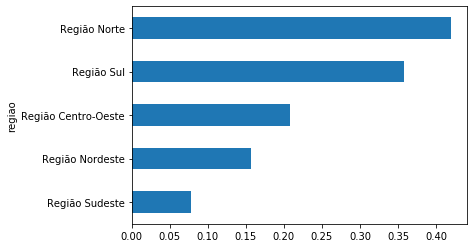

In [355]:
# Visualização da parcela de município que utilizam o mesmo domínio, por região
ax = df_merged['% de iguais'].plot.barh()
ax.invert_yaxis()

### Análise regional: resultados
1. Neste item, o destaque negativo vai para a região Norte, onde 31 municípios são atendidos por apenas 18 domínios. Assim, mais de 40% dos municípios desse estado não são atendidos por domínios exclusivos.
2. Na outra ponta, a região Sudeste é a que possui um maior percentual de municípios atendidos por domínios exclusivos.
3. A análise sugere que o uso de domínios compartilhados com outros municípios pode ser uma estratégia de redução de custos ou de para mitigar a falta de infraestrutura ou mão de obra qualificada de TI.